# SER - Exploratory Data Analysis

In [1]:
# built-in imports
import sys
import os
# src imports
module_path = os.path.abspath(os.path.join('..', '..')) 
sys.path.insert(0, module_path)
from src.utils import load_emodb, load_ravdess, load_tess, load_crema_d, filter_emotions, load_iemocap
# 
import numpy as np
import pandas as pd

# load datasets
emodb = load_emodb() #filter_emotions(load_emodb())
ravdess = load_ravdess() #filter_emotions(load_ravdess())
tess = load_tess() #filter_emotions(load_tess())
crema = load_crema_d() #filter_emotions(load_crema_d())

# add a dataset column to each dataset
emodb['dataset'] = 'emodb'
ravdess['dataset'] = 'ravdess'
tess['dataset'] = 'tess'
crema['dataset'] = 'crema'



Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/uwrfkaggler/ravdess-emotional-speech-audio/versions/1
['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'audio_speech_actors_01-24', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/toronto-emotional-speech-set-tess/versions/1
['TESS']
['YAF_disgust', 'OAF_Pleasant_surprise', 'OAF_happy', 'YAF_sad', 'YAF_happy', 'YAF_neutral', 'OAF_Fear', 'OAF_angry', 'YAF_pleasant_surprised', 'YAF_fear', 'OAF_neutral', 'OAF_disgust', 'YAF_angry', 'OAF_Sad']
Path to dataset files: /Users/sofiafernandes/.cache/kagglehub/datasets/ejlok1/c

In [12]:
iemocap = filter_emotions(load_iemocap())
iemocap.head()

Subfolders in the dataset: ['IEMOCAP_full_release']


session  method gender emotion  n_annotators  agreement  \
0        1  script      F     neu             3          3   
1        1  script      F     sur             3          2   
2        1  script      F     neu             3          2   
3        1  script      F     ang             3          2   
4        1  script      F     ang             3          2   

                                                path     label  \
0  Session1/sentences/wav/Ses01F_script02_1/Ses01...   neutral   
1  Session1/sentences/wav/Ses01F_script02_1/Ses01...  surprise   
2  Session1/sentences/wav/Ses01F_script02_1/Ses01...   neutral   
3  Session1/sentences/wav/Ses01F_script02_1/Ses01...     angry   
4  Session1/sentences/wav/Ses01F_script02_1/Ses01...     angry   

                                            filename  
0  /Users/sofiafernandes/.cache/kagglehub/dataset...  
1  /Users/sofiafernandes/.cache/kagglehub/dataset...  
2  /Users/sofiafernandes/.cache/kagglehub/dataset...  
3  /Users/sofiafernandes/.cache/kagglehub/dataset...  
4  /Users/sofiafernandes/.cache/kagglehub/dataset...

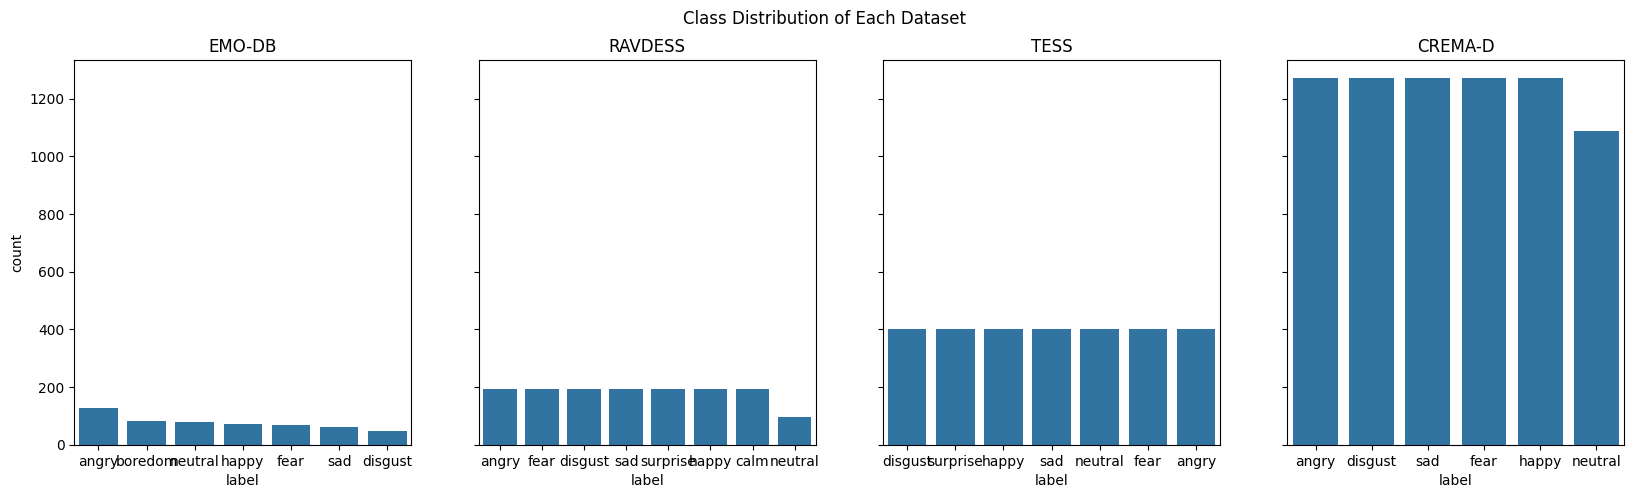

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot class distribution of each dataset in a row of 4 subplots
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
sns.countplot(x='label', data=emodb, ax=axes[0], order=emodb['label'].value_counts().index)
axes[0].set_title('EMO-DB')
sns.countplot(x='label', data=ravdess, ax=axes[1], order=ravdess['label'].value_counts().index)
axes[1].set_title('RAVDESS')
sns.countplot(x='label', data=tess, ax=axes[2], order=tess['label'].value_counts().index)
axes[2].set_title('TESS')
sns.countplot(x='label', data=crema, ax=axes[3], order=crema['label'].value_counts().index)
axes[3].set_title('CREMA-D')
plt.suptitle('Class Distribution of Each Dataset')
plt.show()
plt.savefig('countplots.png')

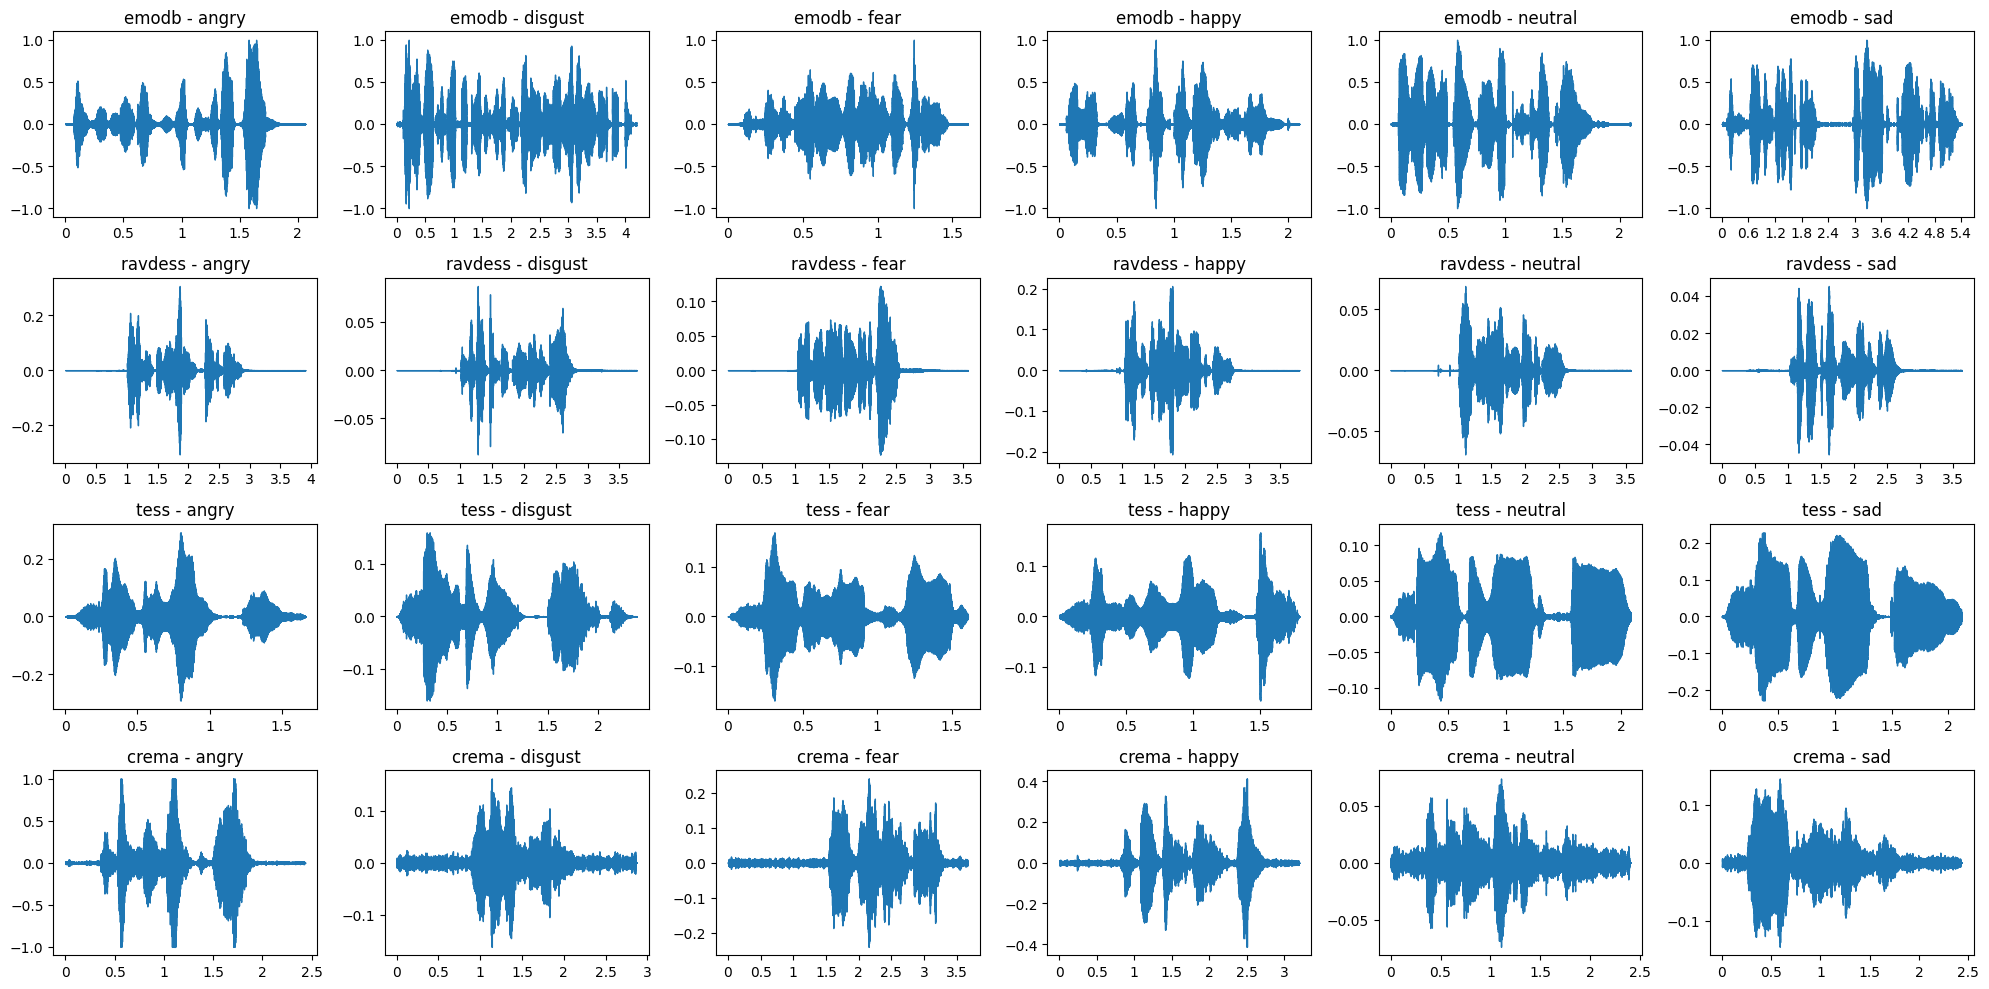

In [4]:
# plot a waveform of each emotion for each dataset (4 rows, 7 columns)
import matplotlib.pyplot as plt
import librosa.display
fig, axs = plt.subplots(4, 6, figsize=(20, 10))
for i, dataset in enumerate([emodb, ravdess, tess, crema]):
    for j, emotion in enumerate(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']):#, 'surprise']):
        # get the first sample of the emotion
        sample = dataset[dataset['label'] == emotion].iloc[0]
        # load the audio file
        y, sr = librosa.load(sample['filename'], sr=None)
        # plot the waveform
        librosa.display.waveshow(y, sr=sr, ax=axs[i, j])
        axs[i, j].set_title(f'{dataset["dataset"].iloc[0]} - {emotion}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('waveforms.png')
plt.show()

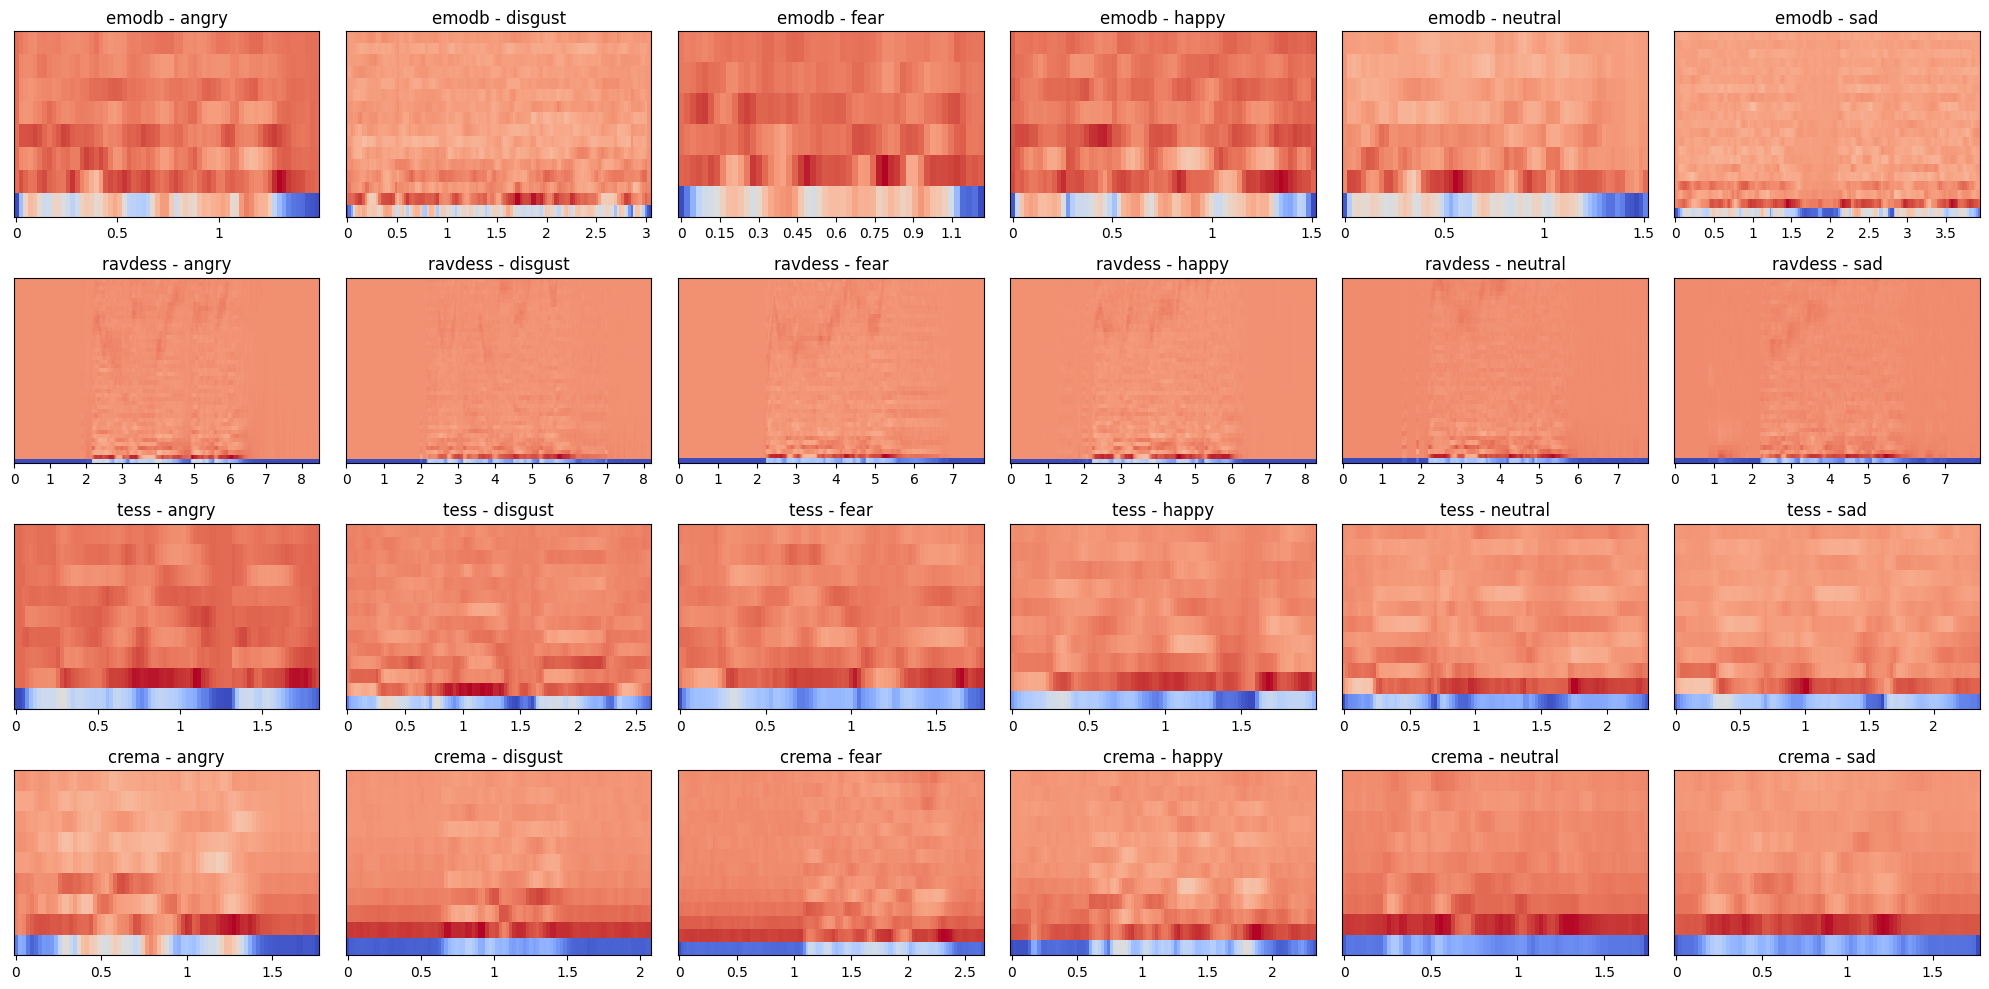

In [22]:
# plot mfcc of each emotion for each dataset (4 rows, 6 columns)
import matplotlib.pyplot as plt
import librosa.display
fig, axs = plt.subplots(4, 6, figsize=(20, 10))
for i, dataset in enumerate([emodb, ravdess, tess, crema]):
    for j, emotion in enumerate(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']):#, 'surprise']):
        # get the first sample of the emotion
        sample = dataset[dataset['label'] == emotion].iloc[0]
        # load the audio file
        y, sr = librosa.load(sample['filename'], sr=None)
        # compute mfcc
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=len(y)//4096)
        # plot the mfcc
        img = librosa.display.specshow(mfccs, x_axis='time', ax=axs[i, j])
        axs[i, j].set_title(f'{dataset["dataset"].iloc[0]} - {emotion}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('mfccs-resized.png')
plt.show()

/Users/sofiafernandes/miniconda3/envs/varm/lib/python3.8/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


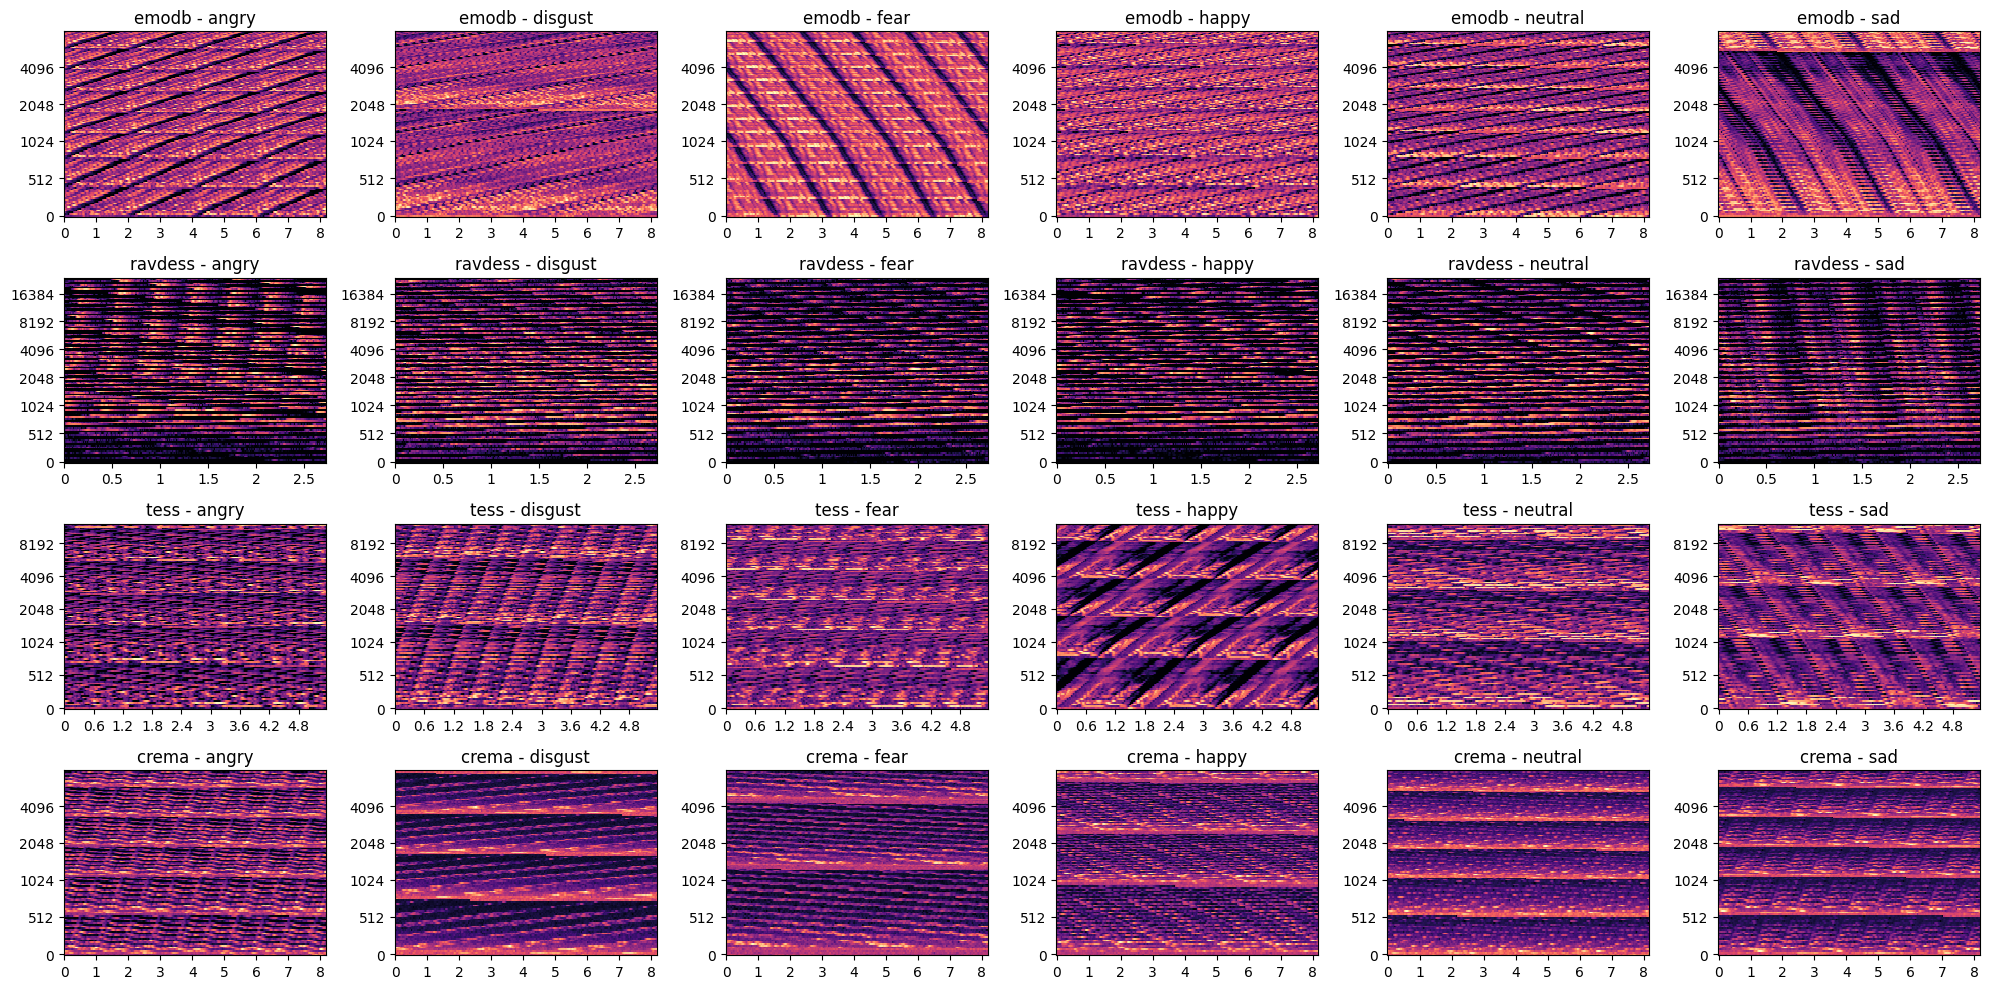

In [25]:
# plot spectrogram of each emotion for each dataset (4 rows, 6 columns)
import matplotlib.pyplot as plt
import librosa.display
fig, axs = plt.subplots(4, 6, figsize=(20, 10))
for i, dataset in enumerate([emodb, ravdess, tess, crema]): 
    for j, emotion in enumerate(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']):#, 'surprise']):
        # get the first sample of the emotion
        sample = dataset[dataset['label'] == emotion].iloc[0]
        # load the audio file
        y, sr = librosa.load(sample['filename'], sr=None)
        # compute spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=len(y)//512)#128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        S_dB_resized = np.resize(S_dB, (128, 256))
        # plot the spectrogram
        img = librosa.display.specshow(S_dB_resized, x_axis='time', y_axis='mel', sr=sr, ax=axs[i, j])
        axs[i, j].set_title(f'{dataset["dataset"].iloc[0]} - {emotion}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('spectrograms.png')
plt.show()

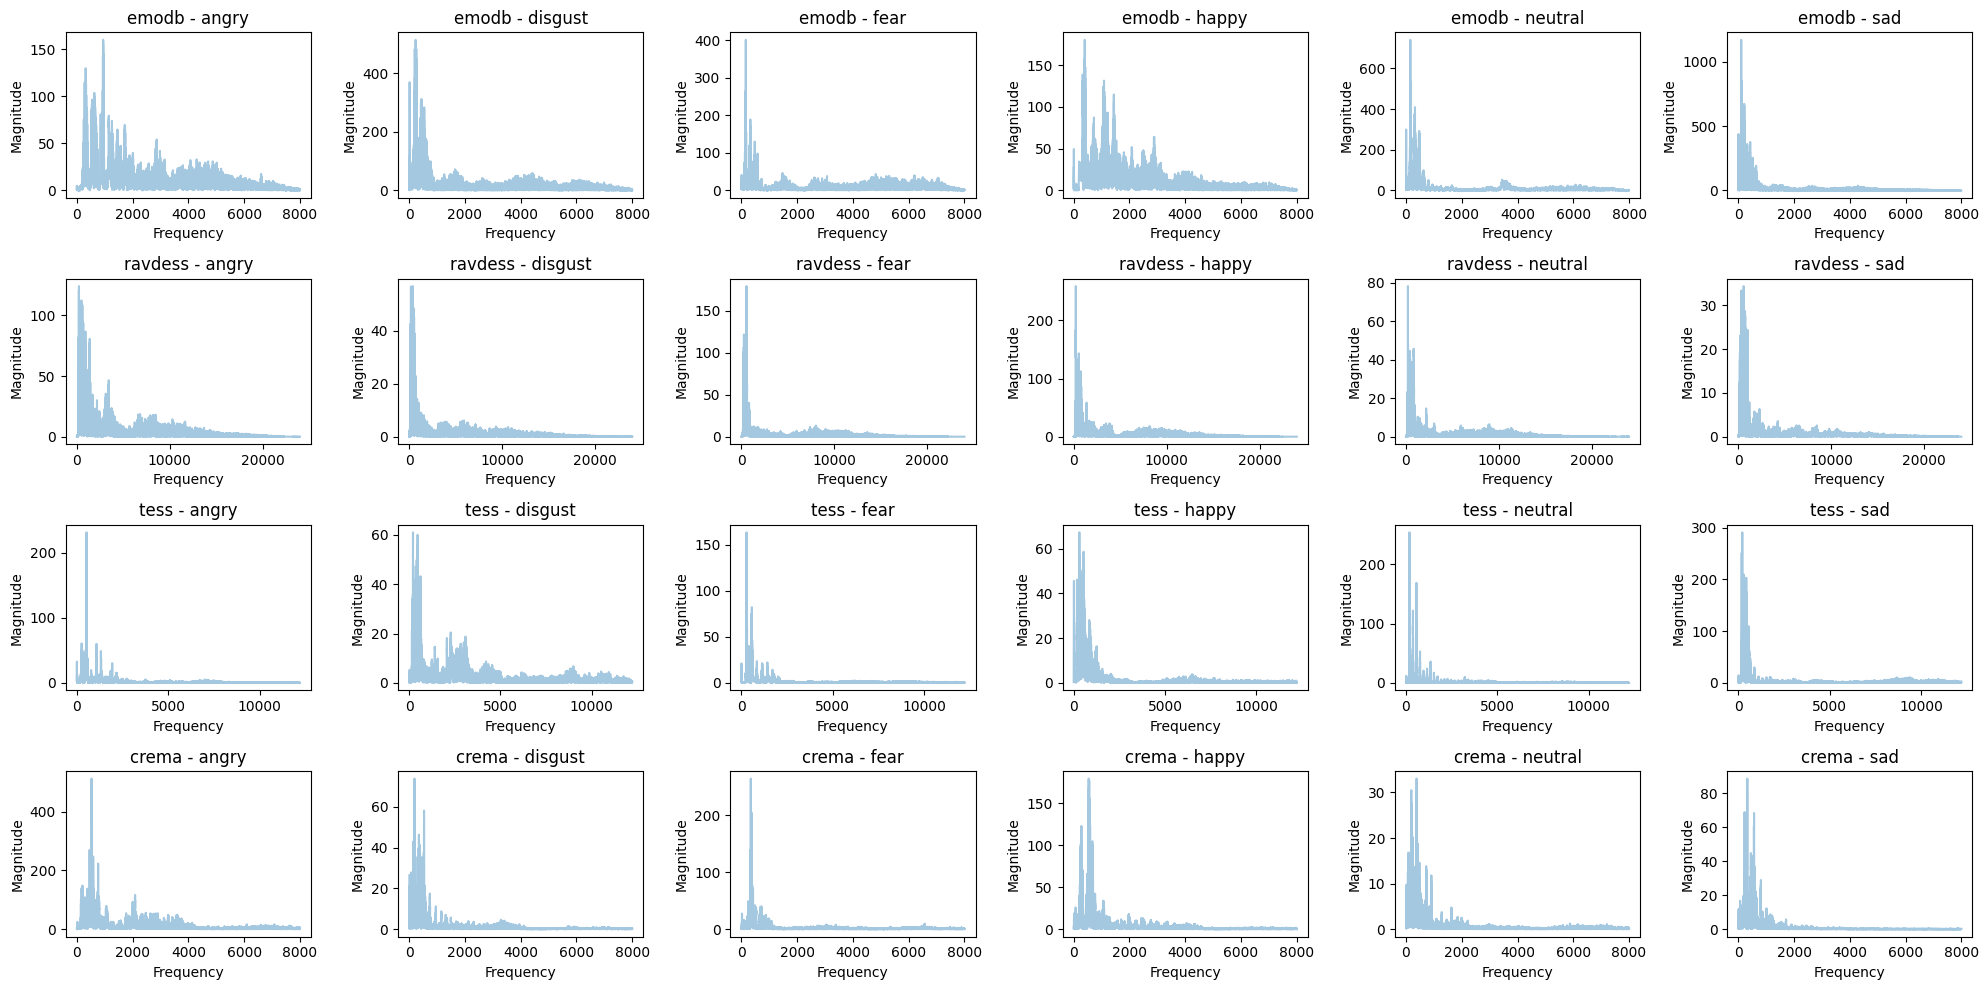

In [10]:

# plot power spectrum for each emotion for each dataset (4 rows, 6 columns), dont need imports, based on above
fig, axs = plt.subplots(4, 6, figsize=(20, 10))
for i, dataset in enumerate([emodb, ravdess, tess, crema]): 
    for j, emotion in enumerate(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']):#, 'surprise']):
        # get the first sample of the emotion
        sample = dataset[dataset['label'] == emotion].iloc[0]
        # load the audio file
        y, sr = librosa.load(sample['filename'], sr=None)
        # compute fft
        fft = np.fft.fft(y)
        spectrum = np.abs(fft)
        f = np.linspace(0, sr, len(spectrum))
        left_spectrum = spectrum[:int(len(spectrum)/2)]
        left_f = f[:int(len(spectrum)/2)]
        # plot the power spectrum
        axs[i, j].plot(left_f, left_spectrum, alpha=0.4)
        axs[i, j].set_title(f'{dataset["dataset"].iloc[0]} - {emotion}')
        axs[i, j].set_xlabel('Frequency')
        axs[i, j].set_ylabel('Magnitude')
plt.tight_layout()
plt.savefig('power_spectrums.png')
plt.show()

/var/folders/0s/lm29041s6hv5pq_lc3jblq540000gn/T/ipykernel_75860/3893080447.py:10: RuntimeWarning: divide by zero encountered in log
  S = np.log(np.abs(librosa.stft(y)))


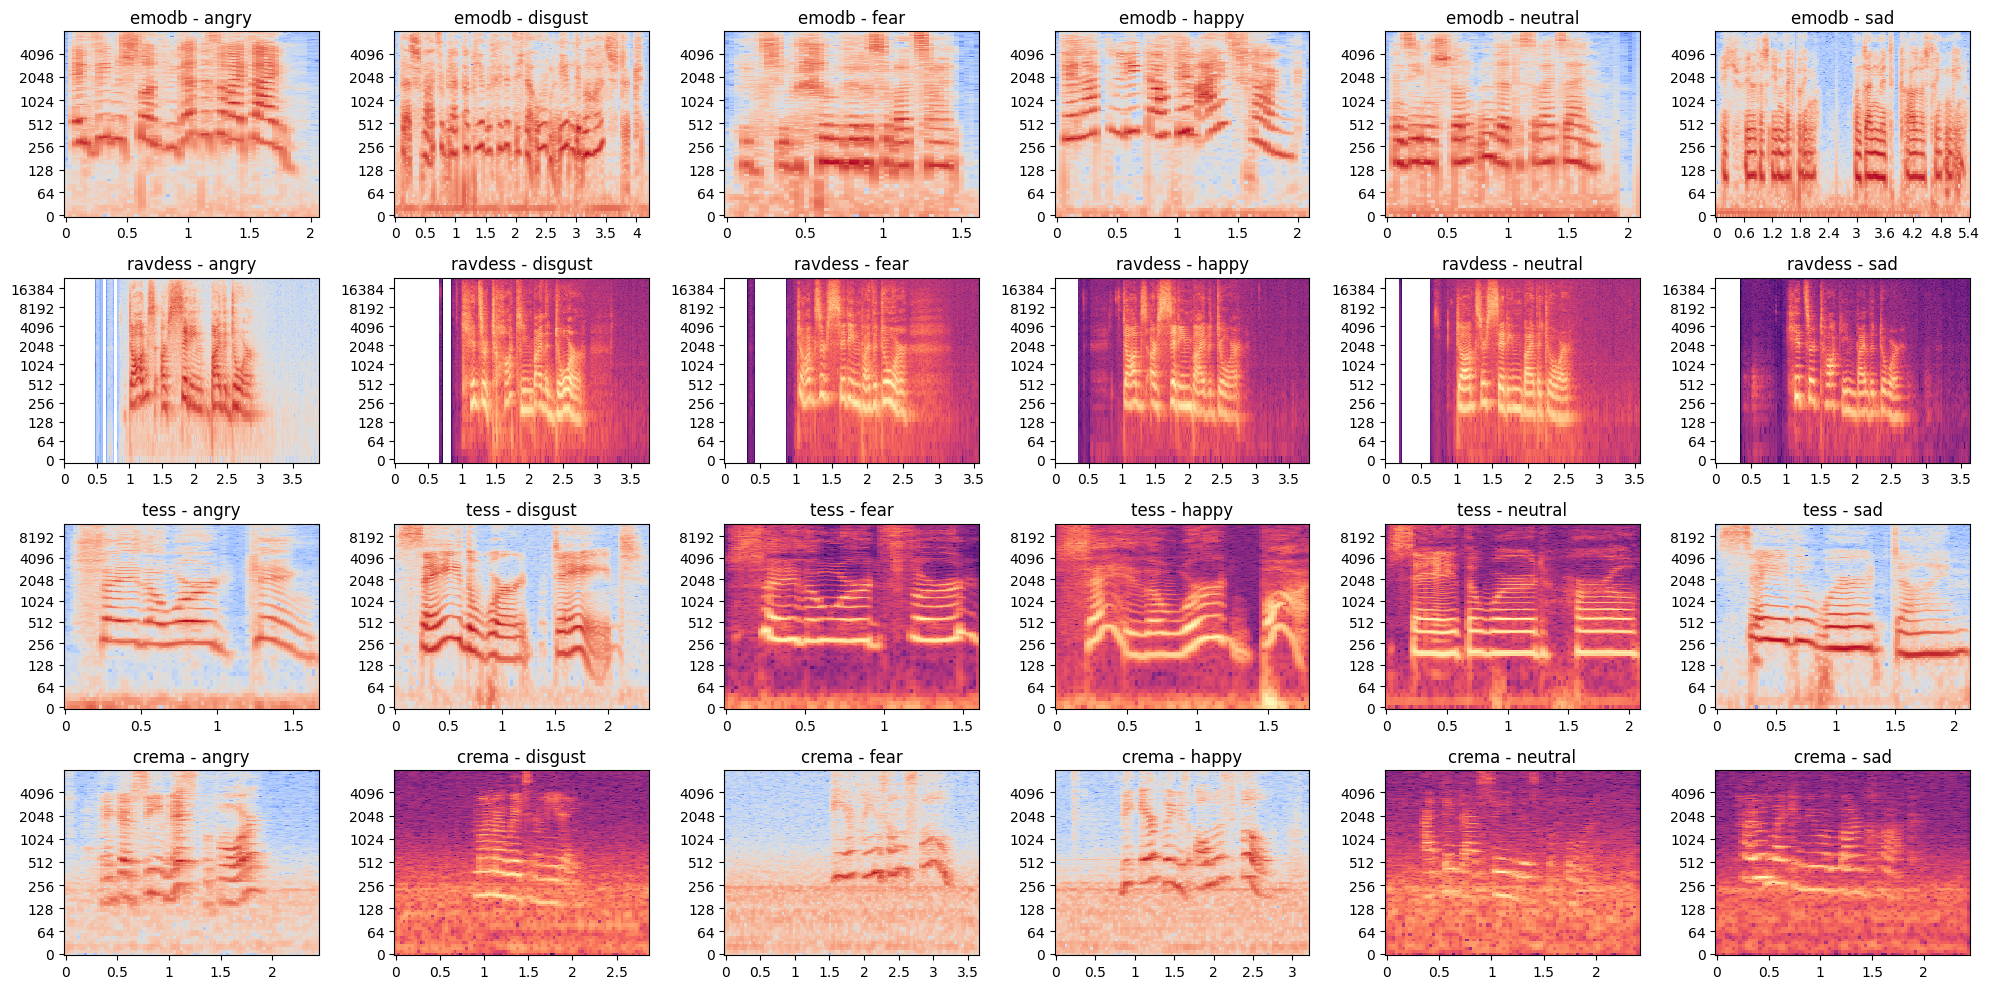

In [27]:

# plot short fourier transform for each emotion for each dataset (4 rows, 6 columns), dont need imports, based on above
fig, axs = plt.subplots(4, 6, figsize=(20, 10))
for i, dataset in enumerate([emodb, ravdess, tess, crema]): 
    for j, emotion in enumerate(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']):#, 'surprise']):
        # get the first sample of the emotion
        sample = dataset[dataset['label'] == emotion].iloc[0]
        # load the audio file
        y, sr = librosa.load(sample['filename'], sr=None)
        # compute stft
        S = np.log(np.abs(librosa.stft(y)))
        S_resized = np.resize(S, (128, 256))
        # plot the stft
        img = librosa.display.specshow(S, x_axis='time', y_axis='log', sr=sr, ax=axs[i, j])
        axs[i, j].set_title(f'{dataset["dataset"].iloc[0]} - {emotion}')
        axs[i, j].set_xlabel('')
        axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('stft-log-resized.png')
plt.show()


In [8]:
y, _ = librosa.load(emodb.iloc[0]['filename'], sr=None)
S = librosa.feature.melspectrogram(y=y, sr=_, n_mels=128)
S.shape

(128, 65)

In [ ]:
import numpy as np
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# -----------------------------
# CNN model definition
# -----------------------------
class AudioCNN(tf.keras.Model):
    def __init__(self, input_shape=(128, 256, 1), n_classes=6): # input_shape=(128, 256, 1)
        super(AudioCNN, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=input_shape)
        self.pool1 = tf.keras.layers.MaxPooling2D((2,2))
        self.conv2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')
        self.pool2 = tf.keras.layers.MaxPooling2D((2,2))
        self.conv3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')
        self.pool3 = tf.keras.layers.MaxPooling2D((2,2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout = tf.keras.layers.Dropout(0.3)
        self.fc = tf.keras.layers.Dense(n_classes, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = self.flatten(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# -----------------------------
# Dataset preparation
# -----------------------------
def prepare_dataset(df, sr=16000, n_mels=128, resize_shape=(128, 256)):
    """
    df: DataFrame with 'filename' and 'label' columns
    sr: sampling rate
    n_mels: number of STFT bins (frequency axis)
    resize_shape: (height, width) of STFT images for CNN
    """
    # Encode labels
    le = LabelEncoder()
    df['label_enc'] = le.fit_transform(df['label'])
    labels = df['label_enc'].values
    n_classes = len(le.classes_)

    stft_list = []
    for fname in df['filename']:
        y, _ = librosa.load(fname, sr=sr)
        #S = np.abs(librosa.stft(y))
        #S_db = np.log1p(S)  # log-scale
        # Resize to fixed shape
        #S_resized = np.resize(S_db, resize_shape)
        # compute spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)#len(y)//512)#128)
        S_dB = librosa.power_to_db(S, ref=np.max)

        S_resized = np.resize(S_dB, (128, 256))
        # Add channel dimension
        S_resized = S_resized[..., np.newaxis]
        stft_list.append(S_resized)

    X = np.array(stft_list, dtype=np.float32)
    y = tf.keras.utils.to_categorical(labels, num_classes=n_classes)

    return X, y, n_classes

# -----------------------------
# Example usage
# -----------------------------
# Suppose you have DataFrames: train_df, valid_df
# train_df = pd.read_csv('train.csv')
# valid_df = pd.read_csv('valid.csv')

# Prepare datasets
X_train, y_train, n_classes = prepare_dataset(pd.concat([emodb,tess,crema,ravdess]))
X_valid, y_valid, _ = prepare_dataset(iemocap)

# Create model
cnn_model = AudioCNN(input_shape=X_train.shape[1:], n_classes=n_classes)
#cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 30
# Create an Adam optimizer with a decay rate
initial_learning_rate = 0.001
decay_rate = initial_learning_rate / epochs

# To use an ExponentialDecay schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=X_train.shape[0] / 16, # number of steps per epoch
    decay_rate=0.96,
    staircase=True)

# Compile the model with the customized optimizer
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Train
cnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
              batch_size=16, epochs=30)

# Predict on a single file
def predict_file(fname):
    y, _ = librosa.load(fname, sr=16000)
    S = np.abs(librosa.stft(y))
    S_db = np.log1p(S)
    S_resized = np.resize(S_db, (128,256))[..., np.newaxis]
    X = np.expand_dims(S_resized, axis=0)
    pred = cnn_model.predict(X)
    label_idx = np.argmax(pred, axis=1)[0]
    return label_idx

# Example:
# label_pred = predict_file('audio_example.wav')
# print("Predicted label index:", label_pred)


Epoch 1/30
747/747 [==============================] - 146s 192ms/step - loss: 2.4400 - accuracy: 0.2204 - val_loss: 1.8522 - val_accuracy: 0.2757
Epoch 2/30
747/747 [==============================] - 162s 217ms/step - loss: 1.6181 - accuracy: 0.3516 - val_loss: 1.8829 - val_accuracy: 0.2942
Epoch 3/30
747/747 [==============================] - 148s 198ms/step - loss: 1.5329 - accuracy: 0.3966 - val_loss: 1.9339 - val_accuracy: 0.2479
Epoch 4/30
747/747 [==============================] - 146s 195ms/step - loss: 1.4310 - accuracy: 0.4443 - val_loss: 2.1517 - val_accuracy: 0.2919
Epoch 5/30
747/747 [==============================] - 141s 189ms/step - loss: 1.3449 - accuracy: 0.4699 - val_loss: 2.0329 - val_accuracy: 0.2337
Epoch 6/30
747/747 [==============================] - 149s 199ms/step - loss: 1.2780 - accuracy: 0.4972 - val_loss: 2.1596 - val_accuracy: 0.2509
Epoch 7/30
747/747 [==============================] - 164s 220ms/step - loss: 1.2058 - accuracy: 0.5259 - val_loss: 2.3256 -

In [31]:
# Prepare datasets
X_train, y_train, n_classes = prepare_dataset(tess)
X_valid, y_valid, _ = prepare_dataset(ravdess)

# Create model
cnn_model = AudioCNN(input_shape=X_train.shape[1:], n_classes=n_classes)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
cnn_model.fit(X_train, y_train, validation_data=(X_valid, y_valid),
              batch_size=16, epochs=30)

Epoch 1/30
175/175 [==============================] - 36s 198ms/step - loss: 0.8097 - accuracy: 0.7146 - val_loss: 3.9944 - val_accuracy: 0.1835
Epoch 2/30
175/175 [==============================] - 34s 192ms/step - loss: 0.2215 - accuracy: 0.9293 - val_loss: 4.3068 - val_accuracy: 0.2011
Epoch 3/30
175/175 [==============================] - 33s 188ms/step - loss: 0.0957 - accuracy: 0.9693 - val_loss: 4.3770 - val_accuracy: 0.2171
Epoch 4/30
175/175 [==============================] - 33s 191ms/step - loss: 0.0467 - accuracy: 0.9846 - val_loss: 5.3707 - val_accuracy: 0.2171
Epoch 5/30
175/175 [==============================] - 33s 188ms/step - loss: 0.0231 - accuracy: 0.9950 - val_loss: 7.7945 - val_accuracy: 0.2300
Epoch 6/30
175/175 [==============================] - 33s 189ms/step - loss: 0.0425 - accuracy: 0.9857 - val_loss: 6.9457 - val_accuracy: 0.2139
Epoch 7/30
175/175 [==============================] - 33s 189ms/step - loss: 0.0307 - accuracy: 0.9882 - val_loss: 7.2597 - val_ac

KeyboardInterrupt: 